In [84]:
import pandas as pd
import numpy as np
from numpy import ravel
import altair as alt
from sklearn.naive_bayes import *



from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure
from IPython.display import display

import ipywidgets as widgets

In [85]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [86]:
#from google.colab import drive
#drive.mount('/content/gdrive')
new_df = pd.read_csv('/content/drive/MyDrive/Final Project 207/datasets/X_MATRIX_for_multi_player_model.csv')



In [88]:
hitters = pd.read_csv('/content/drive/MyDrive/Final Project 207/datasets/hitters_for_mickey.csv')
pitchers = pd.read_csv('/content/drive/MyDrive/Final Project 207/datasets/pitchers_for_mickey.csv')




In [89]:
#create pitchers dict

hitters_dict = hitters.groupby('player_name')['player_id'].apply(list).to_dict()
pitchers_dict = pitchers.groupby('player_name')['player_id'].apply(list).to_dict()
pitcher_era_dict = new_df.groupby('pitcher')['pitcher_era'].apply(list).to_dict()



In [90]:

hitter = widgets.Dropdown(
    options=list(hitters_dict.keys()),
    value='Olson, Matt',
    description='Hitter:',
    disabled=False,
)


pitcher = widgets.Dropdown(
    options=list(pitchers_dict.keys()),
    value='Wheeler, Zack',
    description='Pitcher:',
    disabled=False,
)

first_base = widgets.Checkbox(
    value=False,
    description='1st base',
    indent=False
)





second_base = widgets.Checkbox(
    value=False,
    description='2nd base',
    indent=False
)


third_base = widgets.Checkbox(
    value=False,
    description='3rd base',
    indent=False
)

lefty = widgets.Checkbox(
    value=False,
    description='Pitcher is Left Handed',
    indent=False
)



shifted = widgets.Checkbox(
    value=False,
    description='Infield Alignment Shifted',
    indent=False
)


standard = widgets.Checkbox(
    value=True,
    description='Infield Alignment Standard',
    indent=False
)


standardOF = widgets.Checkbox(
    value=False,
    description= 'Outfield Alignment Standard',
    indent=False
)


outs = widgets.Dropdown(
    options=[0,1,2],
    value=0,
    description='Outs',
    disabled=False,
)


In [91]:
#CHOOSE YOUR FIGHTER

display(widgets.HBox((hitter, pitcher)))

In [78]:
#who's on first, what's on second, I don't know's on third.
display(widgets.HBox((first_base,second_base,third_base)))

In [79]:
#does anyone ectually know what these are

display(widgets.HBox((lefty,shifted,standard,standardOF, outs)))

In [80]:
hitter = hitter.value
pitcher = pitcher.value
first_base = first_base.value
second_base = second_base.value
third_base = third_base.value
lefty = lefty.value
shifted = shifted.value
standard = standard.value
standardOF = standardOF.value
outs = outs.value



print(hitter,pitcher,first_base,second_base,third_base,lefty,shifted,standard,standardOF, outs)


Olson, Matt Wendelken, J.B. False True False False False True False 1


In [81]:
def make_input(hitter = hitter,pitcher = pitcher,first_base = first_base,second_base = second_base,third_base = third_base,lefty=lefty,shifted=shifted,standard=standard,standardOF=standardOF,outs=outs):
  #get hitter/pitcher info
  hitter_id = hitters_dict[hitter][0]
  pitcher_id = pitchers_dict[pitcher][0]
  pitcher_era = pitcher_era_dict[pitcher_id][0]

  x_test = []

  x_test.append(int(first_base))
  x_test.append(int(second_base))
  x_test.append(int(third_base))
  x_test.append(int(lefty))
  x_test.append(int(shifted))
  x_test.append(int(standard))
  x_test.append(int(standardOF))
  if outs ==0:
    x_test += [0,0,0]
  elif outs == 1:
    x_test += [ 0,1,0]
  else:
    x_test += [0,0,1]

  x_test.append(pitcher_era)

  x_test = np.ravel(x_test)
  x_test = [list(x_test)]
  
  return hitter_id,x_test


  # get pitcher era


hitter_id,x_test = make_input()


In [82]:
columns = ['on_1b', 'on_2b', 'on_3b',
       'p_throws_L', 'if_fielding_alignment_Infield shift',
       'if_fielding_alignment_Standard', 'of_fielding_alignment_Standard',
       'outs_when_up_0', 'outs_when_up_1', 'outs_when_up_2', 'pitcher_era']

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  "X does not have valid feature names, but"


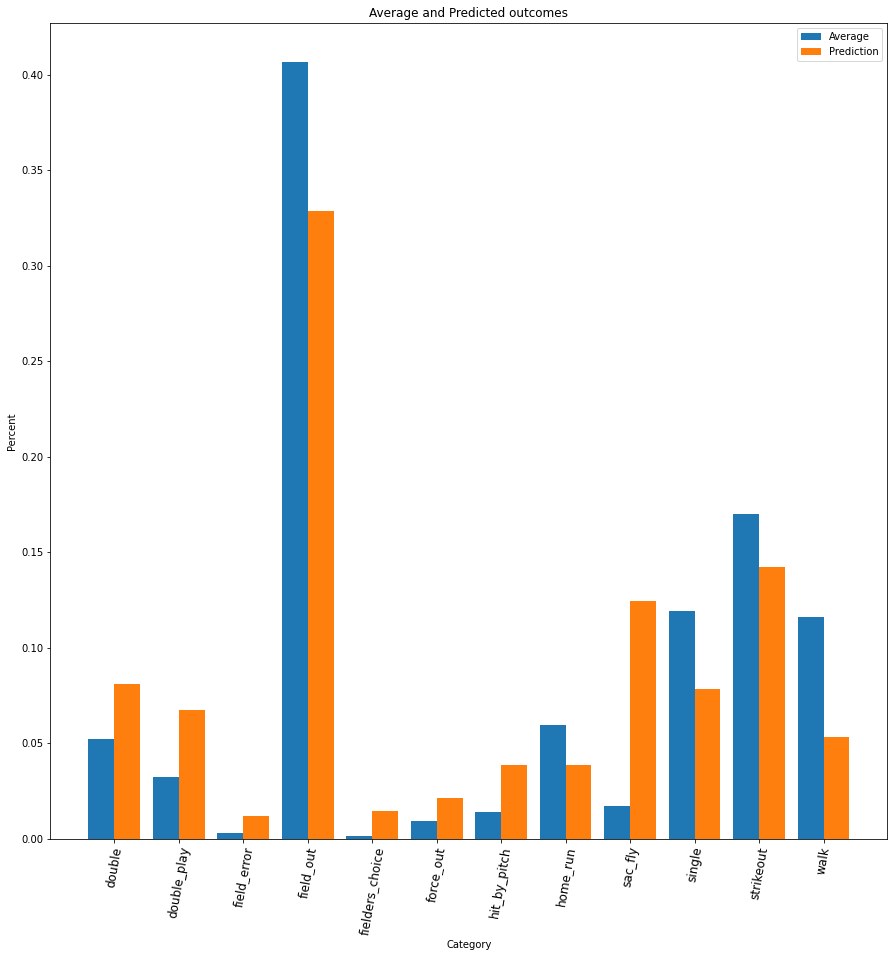

In [83]:
def multi_model(hitter,df,game_state):
  
  #Sorting for hitter
  df = df[df['hitter']==hitter]
  
  #getting outcome and baseline avg 
  outcome = df['outcome']
  outcome_average = outcome.value_counts().sort_index()/len(outcome)
  
  #getting relevent columns
  x_matrix = df[columns]
 
 #model makeing
  clf = MultinomialNB(alpha=1)
  clf.fit(x_matrix,np.ravel(outcome))


  x = clf.predict_proba(x_test)[0]
  classes = clf.classes_


  df = pd.DataFrame()
  df['Outcomes'] = classes
  df['average'] = list(outcome_average)
  df['model'] = x


  figure(figsize=(15,15))

  X_axis = np.arange(len(classes))
  plt.bar(X_axis - 0.2, list(outcome_average), 0.4, label = 'Average')
  plt.bar(X_axis + 0.2, x, 0.4, label = 'Prediction')


  plt.xticks(X_axis, classes)
  plt.xlabel("Category")
  plt.ylabel("Percent")
  plt.title("Average and Predicted outcomes")
  plt.xticks(rotation = 80, size = 12) 
  plt.legend()
  plt.show()
  





multi_model(hitter_id,new_df,x_test)